# EDA for Yandex.Afisha

# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#data_review)
    * [Conclusions](#data_review_conclusions)
* [Stage 2. Data preprocessing](#data_preprocessing)
    * [Conclusions](#data_preprocessing_conclusions)
* [Stage 3. Data analysis](#da)
    * [Conclusions](#da_conclusions)



## Introduction <a id='intro'></a>
In this project we are working with data from Yandex.Afisha and our first task is to help optimize marketing expenses. 
We are going to study: 
- How people use the product
- When they start to buy
- How much money each customer brings
- When they pay off
 
The project will consist of three stages:
 1. Data overview - importing and looking through 3 provided csv files with data
 2. Data preprocessing - dealing with some data storage errors
 3. Data analysis - answering given questions
 
[Back to Contents](#back)

## Stage 1. Data overview <a id='data_review'></a>
Importing all the necessary libraries and reading the dataset from a csv file using pandas.
Obtaining the information about the table using different ways to check for missing values, duplicates and the correctness of column namings. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.dates as mdates

In [2]:
 try:
    visits = pd.read_csv('datasets/visits_log_us.csv') 
    orders = pd.read_csv('datasets/orders_log_us.csv')
    costs = pd.read_csv('datasets/costs_us.csv')

except FileNotFoundError:
    costs = pd.read_csv('/datasets/costs_us.csv')
    visits = pd.read_csv('/datasets/visits_log_us.csv')
    orders = pd.read_csv('/datasets/orders_log_us.csv')


In [3]:
visits.head()

Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits.describe()

Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19

In [6]:
visits.duplicated().sum()

0

In [7]:
orders.head()

Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [9]:
orders.duplicated().sum()

0

In [10]:
orders.describe()

Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19

In [11]:
costs.head()

source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [13]:
costs.duplicated().sum()

0

In [14]:
costs.describe()

source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000

In [15]:
orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [16]:
visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [17]:
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

## Conclusions <a id='data_review_conclusions'></a>
There are three tables in the dataset.  Below is a data dictionary that lists the columns in each table and describes the data that they hold. 
As well as comments on the necessary preprocessing. 
We have no duplicated rows or missing values, but some columns should better be renamed and datatypes converted.

**visits_log_us.csv:** server logs with data on website visits 
- 'Uid': user's unique identifier
- 'Device': user's device
- 'Start Ts': session start date and time
- 'End Ts': session end date and time
- 'Source Id': identifier of the ad source the user came from

**orders_log_us.csv** - data on orders
- 'Uid': unique identifier of the user making an order
- 'Buy Ts': order date and time
- 'Revenue': Yandex.Afisha's revenue from the order

**costs_us.csv** - ad source identifier
- 'source_id': ad source identifier
- 'dt': date
- 'costs': expenses on this ad source on this day

To move forward, we need to preprocess the data.

## Stage 2. Data preprocessing <a id='data_preprocessing'></a>
Renaming columns and changing datatypes

### `visits` data frame

In [18]:
visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [19]:
visits = visits.rename(columns={'Device': 'device', 'End Ts': 'end_ts', 'Source Id': 'source_id', 'Start Ts': 'start_ts', 'Uid': 'user_id'})

In [20]:
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'user_id'], dtype='object')

In [21]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   user_id    359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [22]:
visits['device'].unique()

array(['touch', 'desktop'], dtype=object)

In [23]:
visits["device"] = visits["device"].astype('category')

In [24]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits["start_ts"] = pd.to_datetime(visits["start_ts"], format="%Y-%m-%d %H:%M:%S")

In [25]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   user_id    359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


### `orders` data frame

In [26]:
orders.columns

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

In [27]:
orders = orders.rename(columns={'Buy Ts': 'buy_ts', 'Revenue': 'revenue', 'Uid': 'user_id'})

In [28]:
orders.columns

Index(['buy_ts', 'revenue', 'user_id'], dtype='object')

In [29]:
orders["buy_ts"] = pd.to_datetime(orders["buy_ts"], format="%Y-%m-%d %H:%M:%S")

In [30]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   user_id  50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


### `costs` data frame

In [31]:
costs.columns

Index(['source_id', 'dt', 'costs'], dtype='object')

In [32]:
costs = costs.rename(
    columns={'dt': 'date'}
)

In [33]:
costs.columns

Index(['source_id', 'date', 'costs'], dtype='object')

In [34]:
costs["date"] = pd.to_datetime(costs["date"], format="%Y-%m-%d")

In [35]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   date       2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


## Conclusions <a id='data_preprocessing_conclusions'></a>
In our exploratory data analysis preprocessing phase, we successfully prepared the dataset for further analysis. The data integrity checks revealed no duplicate records or missing values, indicating a clean and complete dataset to work with. We improved data organization by standardizing column names using a consistent naming convention. Additionally, we optimized data types for each variable to ensure appropriate storage and computational efficiency. These preprocessing steps have established a solid foundation for our subsequent analysis, ensuring that our insights will be based on properly structured and validated data.

## Stage 3. Data analysis <a id='da'></a>

### 3.1 Product

3.1.1 How many people use it every day, week, and month?

In [36]:
visits["day"] = visits["start_ts"].values.astype("datetime64[D]")
visits["week"] = visits['start_ts'].values.astype("datetime64[W]")
visits["month"] = visits["start_ts"].values.astype("datetime64[M]")
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                user_id        day       week      month  
0  16879256277535980062 2017-12-20 2017-12-14 2017-12-01  
1    104060357244891740 2018-02-19 2018-02-15 2018-02-01  
2   7459035603376831527 2017-07-01 2017-06-29 2017-07-01  
3  16174680259334210214 2018-05-20 2018-05-17 2018-05-01  
4   9969694820036681168 2017-12-27 2017-12-21 2017-12-01

In [37]:
dau = visits.groupby(visits["day"])["user_id"].nunique().reset_index()
dau.head()

day  user_id
0 2017-06-01      605
1 2017-06-02      608
2 2017-06-03      445
3 2017-06-04      476
4 2017-06-05      820

In [38]:
dau.describe()

user_id
count   364.000000
mean    907.991758
std     370.513838
min       1.000000
25%     594.000000
50%     921.000000
75%    1173.000000
max    3319.000000

In [39]:
dau[dau['user_id']==1]

day  user_id
303 2018-03-31        1

In [40]:
dau[dau["user_id"] == 3319]

day  user_id
176 2017-11-24     3319

In [41]:
print("Average daily active users:", dau["user_id"].mean().astype(int))

Average daily active users: 907


With an average of 907 visitors per day, the peak was 3319 visitors on 2017-11-24 and the lowest number of 1 - on 2018-03-31, which pulls the mode to 921 visitors per day.

<AxesSubplot:title={'center':'Daily active visitors'}, xlabel='day', ylabel='user_id'>

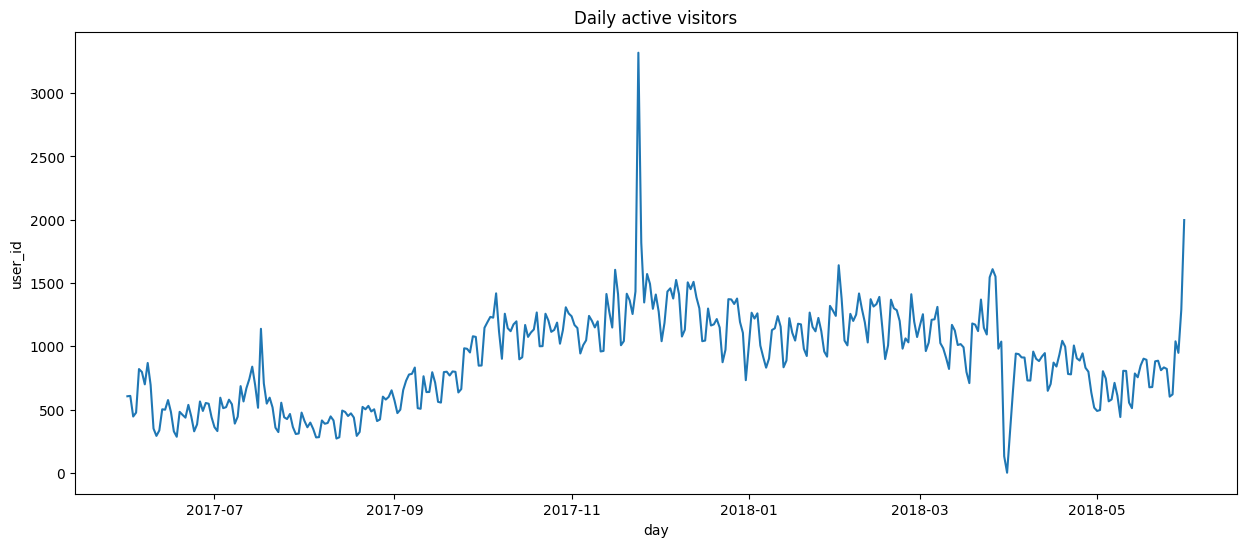

In [42]:
plt.figure(figsize=(15, 6))
plt.title("Daily active visitors")
sns.lineplot(data=dau, x="day", y="user_id")

The highest peak of users activity was on 24-11-2017, which is probably due to black friday event.

In [43]:
wau = visits.groupby(visits["week"])["user_id"].nunique().reset_index()
wau.sort_values(by='user_id').head(5)

week  user_id
52 2018-05-31     1997
9  2017-08-03     2343
8  2017-07-27     2505
10 2017-08-10     2658
2  2017-06-15     2844

In [44]:
wau.sort_values(by="user_id").tail(5)

week  user_id
36 2018-02-08     8218
24 2017-11-16     8294
42 2018-03-22     8486
27 2017-12-07     8575
25 2017-11-23    10716

In [45]:
print("Average weekly active users:", wau["user_id"].mean().astype(int))

Average weekly active users: 5724


In [46]:
import plotly.express as px

fig = px.line(
    wau,
    x="week",
    y="user_id",
    title="Weekly Active Users",
    template="plotly_dark",
    width=1400,
    height=600,
    range_y=[0, 11000],
).update_layout(
    xaxis=dict(title="Week", nticks=13),
    yaxis_title="Number of users",
    title_text="Weekly Active Visitors",
    title_x=0.5,
)

# adding reference line with average WAU over time
fig.add_hline(
    y=wau["user_id"].mean(),
    line_dash="dash",
    line_color="red",
    annotation_text="average WAU",
    annotation_position="top left",
)

fig.update_traces(line={"width": 5})
fig.update_yaxes(dtick=1000)

fig.show()

Starting from September, 28 till March, 25, the number of weekly active users was above average. The worst result shows the August, 3 week. And the best one - November, 23 week.

In [47]:
wau.describe()

user_id
count     53.000000
mean    5724.415094
std     2096.119936
min     1997.000000
25%     4056.000000
50%     5894.000000
75%     7441.000000
max    10716.000000

In [48]:
wau[wau["user_id"] == 1997]

week  user_id
52 2018-05-31     1997

The lowest number of per week visitors is not relevant, as we have data only for 1 day of that week. 

In [49]:
wau.sort_values(by="user_id").head(2)

week  user_id
52 2018-05-31     1997
9  2017-08-03     2343

Despite the "2018-03-31 drop" the week with the lowest number of visitors happened after 2017-08-03.

In [50]:
wau[wau["user_id"] == 10716]

week  user_id
25 2017-11-23    10716

The peak of DAU on 2017-11-24 pulled the whole week to be the most visited.

In [51]:
mau = visits.groupby(visits["month"])["user_id"].nunique().reset_index()
mau.sort_values(by='user_id')

month  user_id
2  2017-08-01    11631
0  2017-06-01    13259
1  2017-07-01    14183
3  2017-09-01    18975
11 2018-05-01    20701
10 2018-04-01    21008
9  2018-03-01    27473
7  2018-01-01    28716
8  2018-02-01    28749
4  2017-10-01    29692
6  2017-12-01    31557
5  2017-11-01    32797

In [52]:
print("Average monthly active users:", mau['user_id'].mean().astype(int))

Average monthly active users: 23228


<AxesSubplot:title={'center':'Monthly active visitors'}, xlabel='month', ylabel='user_id'>

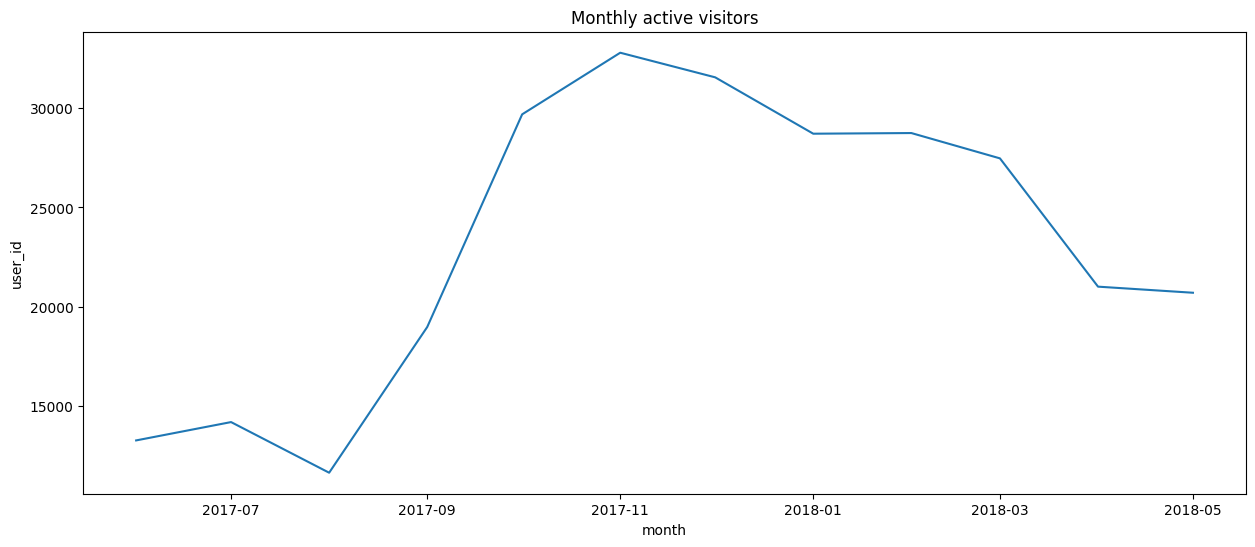

In [53]:
plt.figure(figsize=(15, 6))
plt.title("Monthly active visitors")
sns.lineplot(data=mau, x="month", y="user_id")

November, 2017 showed the peak of monthly active visitors while the lowers numbers had August, 2017. As we can see further on the graph with marketing costs, the rise comes together with rising expences. We can also suggest that there are new year events on december that people may be interested in, as well as buying tickets as a present. 

3.1.2 How many sessions are there per day? (One user might have more than one session.)


In [54]:
sessions = visits.groupby(visits["day"])['start_ts'].count().reset_index()
sessions.head()

day  start_ts
0 2017-06-01       664
1 2017-06-02       658
2 2017-06-03       477
3 2017-06-04       510
4 2017-06-05       893

In [55]:
sessions.describe()

start_ts
count   364.000000
mean    987.362637
std     418.994796
min       1.000000
25%     635.500000
50%    1003.000000
75%    1280.000000
max    4042.000000

In [56]:
sessions[sessions['start_ts']==1]

day  start_ts
303 2018-03-31         1

In [57]:
sessions[sessions["start_ts"] == 4042]

day  start_ts
176 2017-11-24      4042

On average there are 1000 sessions per day with a minimum and a maximum on the same days that we have in our daily active users results - 2018-03-31 and 2017-11-24.

<AxesSubplot:title={'center':'Sessions per day'}, xlabel='day', ylabel='start_ts'>

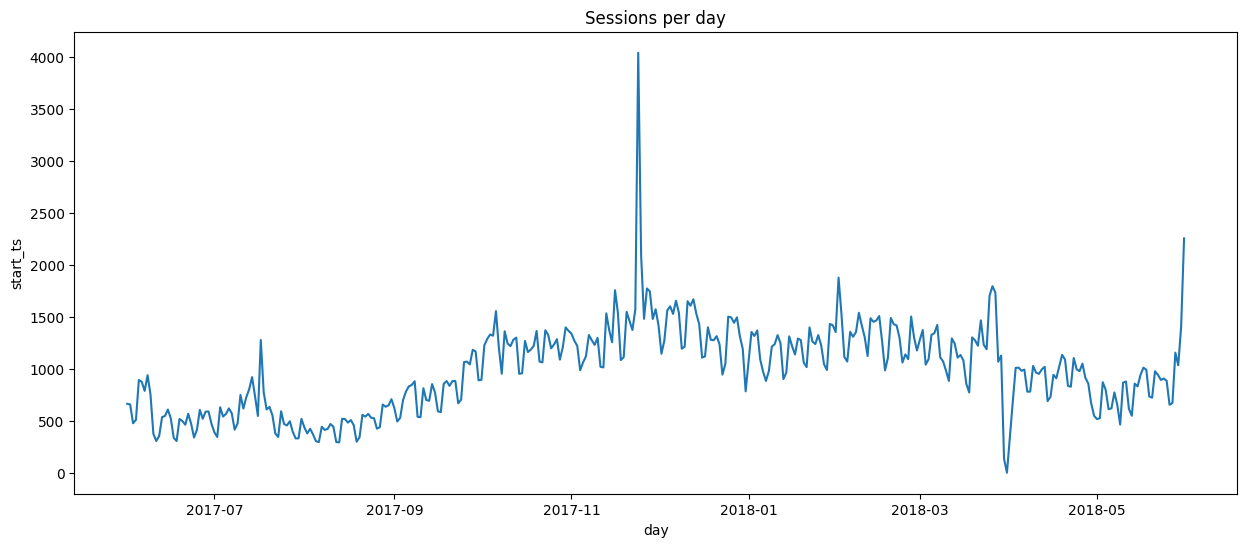

In [58]:
plt.figure(figsize=(15, 6))
plt.title("Sessions per day")
sns.lineplot(data=sessions, x="day", y="start_ts")

On the graph below we see that there is a positive correlation between the number of users and sessions per day.

<AxesSubplot:title={'center':'Sessions per day / Daily active visitors'}, xlabel='day', ylabel='start_ts'>

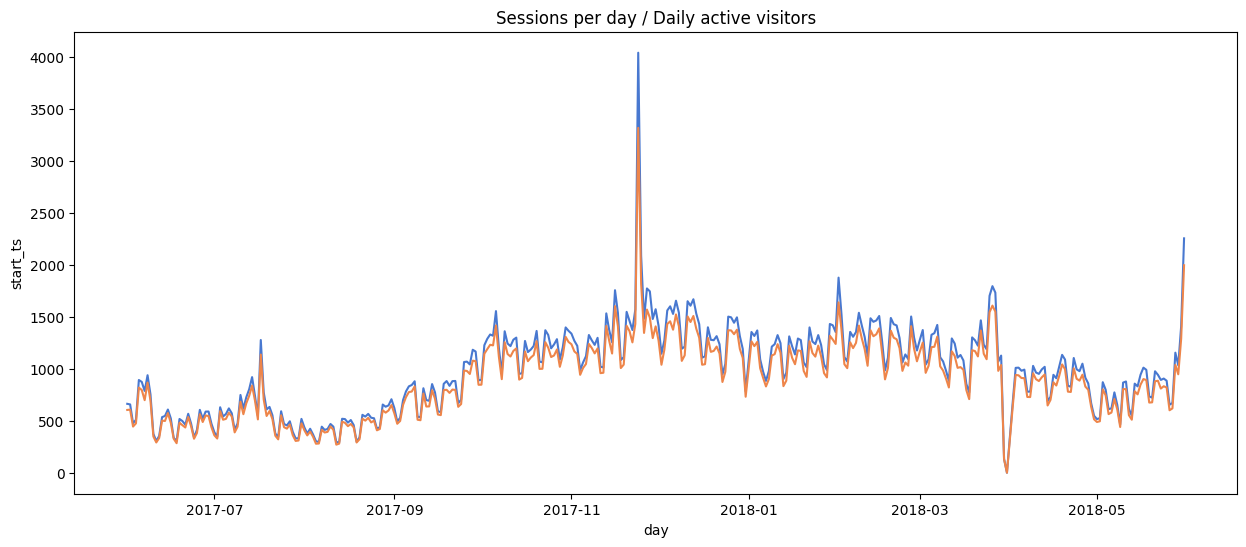

In [59]:
sns.set_palette('muted')
plt.figure(figsize=(15, 6))
plt.title("Sessions per day / Daily active visitors")
sns.lineplot(data=sessions, x="day", y="start_ts")
sns.lineplot(data=dau, x="day", y="user_id")

In [60]:


fig = px.line(sessions, x="day", y="start_ts", title="Sessions per day")
# adding reference line with average DAU over time
fig.add_hline(
    y=sessions["start_ts"].mean(),
    line_dash="dash",
    line_color="purple",
    annotation_text="average session",
    annotation_position="top left",
)
fig.show()

Testing the hypothesis that the weekly ups and downs are caused by the fact that most people tend to buy tickets closer to the weekends.

In [61]:
visits['weekday'] = visits['start_ts'].dt.dayofweek
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                user_id        day       week      month  weekday  
0  16879256277535980062 2017-12-20 2017-12-14 2017-12-01        2  
1    104060357244891740 2018-02-19 2018-02-15 2018-02-01        0  
2   7459035603376831527 2017-07-01 2017-06-29 2017-07-01        5  
3  16174680259334210214 2018-05-20 2018-05-17 2018-05-01        6  
4   9969694820036681168 2017-12-27 2017-12-21 2017-12-01        2

In [62]:
import calendar

calendar.day_name[0]

'Monday'

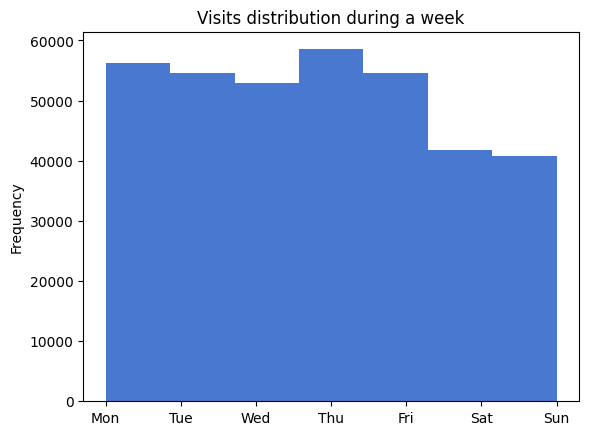

In [63]:
tick = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
fig = visits["weekday"].plot(
    kind="hist",
    bins=7,
    xlabel="Weekday",
    ylabel="Visits",
    title="Visits distribution during a week",
)
fig.set_xticks(range(7))
fig.set_xticklabels([tick[i] for i in range(7)])
plt.show()

It appears that people start buying tickets from the beggining of the week with a peak on Thursday, before the weekend, and show less activity on the weekend itself.

In [64]:
dau.head()

day  user_id
0 2017-06-01      605
1 2017-06-02      608
2 2017-06-03      445
3 2017-06-04      476
4 2017-06-05      820

In [65]:
sessions = sessions.merge(dau, on='day')
sessions.head()

day  start_ts  user_id
0 2017-06-01       664      605
1 2017-06-02       658      608
2 2017-06-03       477      445
3 2017-06-04       510      476
4 2017-06-05       893      820

In [66]:
sessions['sessions_per_user_daily'] = sessions['start_ts']/sessions['user_id']
sessions.head()

day  start_ts  user_id  sessions_per_user_daily
0 2017-06-01       664      605                 1.097521
1 2017-06-02       658      608                 1.082237
2 2017-06-03       477      445                 1.071910
3 2017-06-04       510      476                 1.071429
4 2017-06-05       893      820                 1.089024

<AxesSubplot:title={'center':'Sessions per user per day'}, xlabel='day', ylabel='sessions_per_user_daily'>

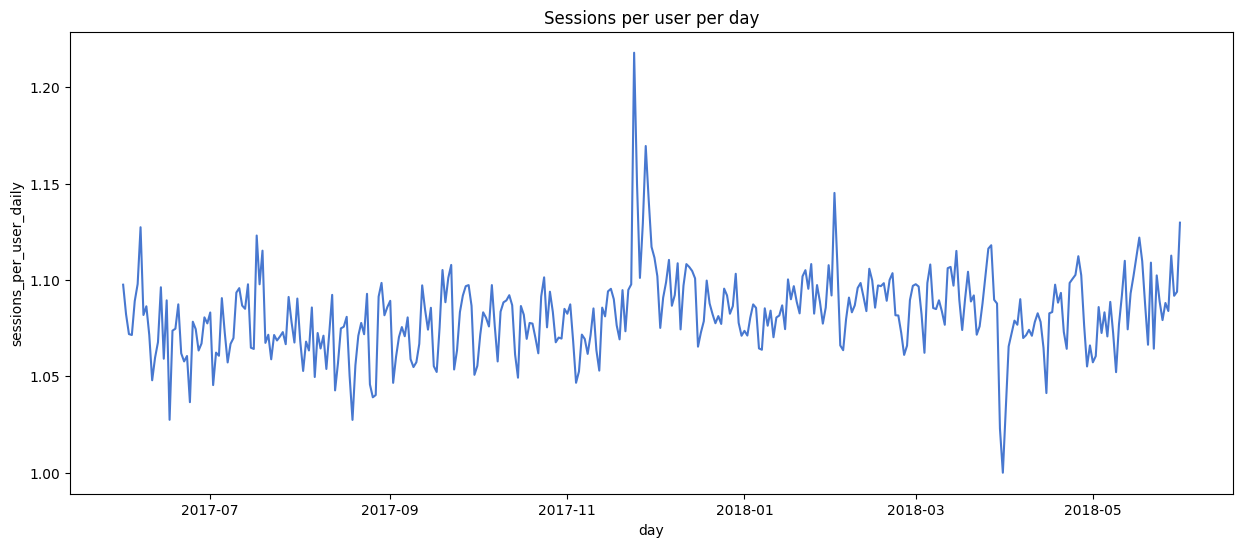

In [67]:
plt.figure(figsize=(15, 6))
plt.title("Sessions per user per day")
sns.lineplot(data=sessions, x="day", y="sessions_per_user_daily")

In [68]:
sessions["sessions_per_user_daily"].describe()

count    364.000000
mean       1.082170
std        0.020876
min        1.000000
25%        1.070321
50%        1.082488
75%        1.093876
max        1.217837
Name: sessions_per_user_daily, dtype: float64

Users tend to visit the website once a day. The biggest number of sessions per day by a user is 1.22, the mean - 1.08.

3.1.3 What is the length of each session?


In [69]:
visits['length'] = visits['end_ts']-visits['start_ts']
visits["length"].describe()

count                       359400
mean     0 days 00:10:43.025687256
std      0 days 00:16:37.127760516
min              -1 days +23:14:00
25%                0 days 00:02:00
50%                0 days 00:05:00
75%                0 days 00:14:00
max                0 days 11:51:00
Name: length, dtype: object

In [70]:
print(visits['length'].sort_values())

177972   -1 days +23:14:00
4181     -1 days +23:28:00
141593     0 days 00:00:00
251174     0 days 00:00:00
70748      0 days 00:00:00
                ...       
221945     0 days 08:44:00
1197       0 days 09:02:00
248062     0 days 09:08:00
177381     0 days 09:56:00
229891     0 days 11:51:00
Name: length, Length: 359400, dtype: timedelta64[ns]


In [71]:
visits[(visits["length"]=='-1 days +23:14:00') | (visits["length"]=='-1 days +23:28:00')]

device              end_ts  source_id            start_ts  \
4181    desktop 2018-03-25 03:18:00          3 2018-03-25 03:50:00   
177972  desktop 2018-03-25 03:09:00          9 2018-03-25 03:55:00   

                     user_id        day       week      month  weekday  \
4181    13092152539246794986 2018-03-25 2018-03-22 2018-03-01        6   
177972   4621202742905035453 2018-03-25 2018-03-22 2018-03-01        6   

                  length  
4181   -1 days +23:28:00  
177972 -1 days +23:14:00

On 2018-03-25 there was a bug in data collection.

In [72]:
visits[(visits["length"]=='0 days 00:00:00')].count()

device       35794
end_ts       35794
source_id    35794
start_ts     35794
user_id      35794
day          35794
week         35794
month        35794
weekday      35794
length       35794
dtype: int64

We have 35794 records with a 0 seconds session that should not be taken into account.

In [73]:
visits["length"] = visits["length"].dt.seconds

In [74]:
visits_length = visits[visits["length"] > 0][["start_ts", 'length']].sort_values(by='start_ts')
visits_length.head()

start_ts  length
308527 2017-06-01 00:01:00      60
245715 2017-06-01 00:02:00     840
11727  2017-06-01 00:09:00     120
69744  2017-06-01 00:14:00     660
278203 2017-06-01 00:14:00    1500

<AxesSubplot:ylabel='Frequency'>

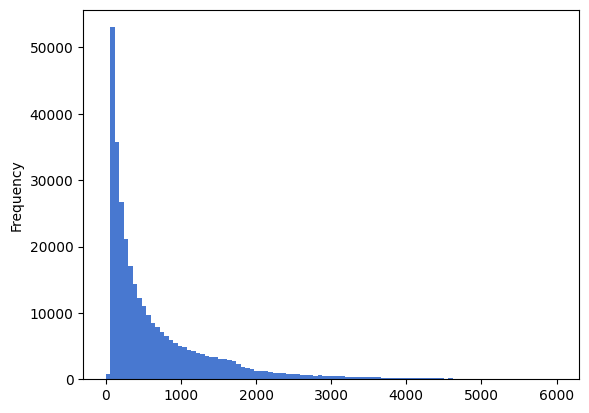

In [75]:
visits_length["length"].plot(kind='hist', bins=100, range=[0, 6000], xlabel='Session length in seconds')

In [76]:
visits_length.describe()

length
count  323606.000000
mean      714.684623
std      1047.052806
min        19.000000
25%       120.000000
50%       360.000000
75%       900.000000
max     84480.000000

In [77]:
visits[visits['length']==84480]

device              end_ts  source_id            start_ts  \
4181  desktop 2018-03-25 03:18:00          3 2018-03-25 03:50:00   

                   user_id        day       week      month  weekday  length  
4181  13092152539246794986 2018-03-25 2018-03-22 2018-03-01        6   84480

In [78]:
visits[visits['length']>4000]['device'].value_counts()

desktop    4431
touch       525
Name: device, dtype: int64

As we have outliers most likely due to visitors using desktops and leaving the website open while not using it, we wont take them into account and conclude that the average session length is 60 seconds (the mode).



In [79]:
print('ASL:', visits_length['length'].mode())

ASL: 0    60
dtype: int64


It is enough to find the event, but usually not enough to make a purchase or surf through the website for other deals, it is recommended to add features to maintain users' attention and suggest other events.

3.1.4 What's the user retention rate?

In [80]:
first = visits.groupby('user_id')['start_ts'].min().dt.date.reset_index()
first.head()

user_id    start_ts
0   11863502262781  2018-03-01
1   49537067089222  2018-02-06
2  297729379853735  2017-06-07
3  313578113262317  2017-09-18
4  325320750514679  2017-09-30

In [81]:
visits=visits.merge(first, how='inner',on=['user_id'])
visits.head()

device              end_ts  source_id          start_ts_x  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   

                user_id        day       week      month  weekday  length  \
0  16879256277535980062 2017-12-20 2017-12-14 2017-12-01        2    1080   
1    104060357244891740 2018-02-19 2018-02-15 2018-02-01        0    1680   
2   7459035603376831527 2017-07-01 2017-06-29 2017-07-01        5       0   
3  16174680259334210214 2018-05-20 2018-05-17 2018-05-01        6    1440   
4  16174680259334210214 2018-03-09 2018-03-08 2018-03-01        4    1680   

   start_ts_y  
0  2017-12-20  
1  2018-02-19  
2  2017-07-01  
3  2018-03-09  
4  2018-03-09

In [82]:
visits = visits.rename(columns={'start_ts_y': 'first_session'})
visits.head()

device              end_ts  source_id          start_ts_x  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   

                user_id        day       week      month  weekday  length  \
0  16879256277535980062 2017-12-20 2017-12-14 2017-12-01        2    1080   
1    104060357244891740 2018-02-19 2018-02-15 2018-02-01        0    1680   
2   7459035603376831527 2017-07-01 2017-06-29 2017-07-01        5       0   
3  16174680259334210214 2018-05-20 2018-05-17 2018-05-01        6    1440   
4  16174680259334210214 2018-03-09 2018-03-08 2018-03-01        4    1680   

  first_session  
0    2017-12-20  
1    2018-02-19  
2    2017-07-01  
3    2018-03-09  
4    2018-03-09

In [83]:
visits['cohort'] = visits['first_session'].values.astype('datetime64[M]')
visits.head()

device              end_ts  source_id          start_ts_x  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   

                user_id        day       week      month  weekday  length  \
0  16879256277535980062 2017-12-20 2017-12-14 2017-12-01        2    1080   
1    104060357244891740 2018-02-19 2018-02-15 2018-02-01        0    1680   
2   7459035603376831527 2017-07-01 2017-06-29 2017-07-01        5       0   
3  16174680259334210214 2018-05-20 2018-05-17 2018-05-01        6    1440   
4  16174680259334210214 2018-03-09 2018-03-08 2018-03-01        4    1680   

  first_session     cohort  
0    2017-12-20 2017-12-01  
1    2018-02-19 2018-02-01  
2    2017-07-01 2017-07-01  
3    2018-03-09 2018-03-01  
4    2018-03-09 2018-03-01

In [84]:
visits["year_month"] = visits["day"]
visits["lt"] = (
    visits["year_month"].dt.to_period("M") - visits["cohort"].dt.to_period("M")
).apply(lambda x: x.n)
visits.head()

device              end_ts  source_id          start_ts_x  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   

                user_id        day       week      month  weekday  length  \
0  16879256277535980062 2017-12-20 2017-12-14 2017-12-01        2    1080   
1    104060357244891740 2018-02-19 2018-02-15 2018-02-01        0    1680   
2   7459035603376831527 2017-07-01 2017-06-29 2017-07-01        5       0   
3  16174680259334210214 2018-05-20 2018-05-17 2018-05-01        6    1440   
4  16174680259334210214 2018-03-09 2018-03-08 2018-03-01        4    1680   

  first_session     cohort year_month  lt  
0    2017-12-20 2017-12-01 2017-12-20   0  
1    2018-02-19 2018-02-01 2018-02-19   0  
2    2017-07-01 2017-07-01 2017-07-01   0  
3    2018-03-09 2018-03-01 2018-05-20   2  
4    2018-03-09 2018-03-01 2018-03-09   0

In [85]:
cohorts = visits.pivot_table(
    index="cohort", columns="lt", values="user_id", aggfunc="nunique"
)
cohorts

lt               0       1       2       3      4      5      6      7   \
cohort                                                                    
2017-06-01  13259.0  1043.0   713.0   814.0  909.0  947.0  809.0  766.0   
2017-07-01  13140.0   737.0   674.0   738.0  765.0  633.0  596.0  601.0   
2017-08-01  10181.0   783.0   640.0   639.0  510.0  448.0  370.0  402.0   
2017-09-01  16704.0  1428.0  1156.0   847.0  658.0  632.0  599.0  404.0   
2017-10-01  25977.0  2042.0  1357.0  1012.0  890.0  837.0  555.0  529.0   
2017-11-01  27248.0  2133.0  1202.0  1054.0  919.0  638.0  594.0    NaN   
2017-12-01  25268.0  1410.0   960.0   786.0  512.0  481.0    NaN    NaN   
2018-01-01  22624.0  1351.0   890.0   565.0  458.0    NaN    NaN    NaN   
2018-02-01  22197.0  1267.0   565.0   446.0    NaN    NaN    NaN    NaN   
2018-03-01  20589.0   861.0   557.0     NaN    NaN    NaN    NaN    NaN   
2018-04-01  15709.0   760.0     NaN     NaN    NaN    NaN    NaN    NaN   
2018-05-01  15273.0     NaN     NaN     NaN    NaN    NaN    NaN    NaN   

lt             8      9      10     11  
cohort                                  
2017-06-01  694.0  674.0  539.0  596.0  
2017-07-01  510.0  376.0  361.0    NaN  
2017-08-01  284.0  265.0    NaN    NaN  
2017-09-01  381.0    NaN    NaN    NaN  
2017-10-01    NaN    NaN    NaN    NaN  
2017-11-01    NaN    NaN    NaN    NaN  
2017-12-01    NaN    NaN    NaN    NaN  
2018-01-01    NaN    NaN    NaN    NaN  
2018-02-01    NaN    NaN    NaN    NaN  
2018-03-01    NaN    NaN    NaN    NaN  
2018-04-01    NaN    NaN    NaN    NaN  
2018-05-01    NaN    NaN    NaN    NaN

In [86]:
retention = cohorts.iloc[:, 0:].div(cohorts[0], axis=0)
retention

lt           0         1         2         3         4         5         6   \
cohort                                                                        
2017-06-01  1.0  0.078664  0.053775  0.061392  0.068557  0.071423  0.061015   
2017-07-01  1.0  0.056088  0.051294  0.056164  0.058219  0.048174  0.045358   
2017-08-01  1.0  0.076908  0.062862  0.062764  0.050093  0.044004  0.036342   
2017-09-01  1.0  0.085489  0.069205  0.050706  0.039392  0.037835  0.035860   
2017-10-01  1.0  0.078608  0.052239  0.038958  0.034261  0.032221  0.021365   
2017-11-01  1.0  0.078281  0.044113  0.038682  0.033727  0.023415  0.021800   
2017-12-01  1.0  0.055802  0.037993  0.031107  0.020263  0.019036       NaN   
2018-01-01  1.0  0.059715  0.039339  0.024973  0.020244       NaN       NaN   
2018-02-01  1.0  0.057080  0.025454  0.020093       NaN       NaN       NaN   
2018-03-01  1.0  0.041818  0.027053       NaN       NaN       NaN       NaN   
2018-04-01  1.0  0.048380       NaN       NaN       NaN       NaN       NaN   
2018-05-01  1.0       NaN       NaN       NaN       NaN       NaN       NaN   

lt                7         8         9         10        11  
cohort                                                        
2017-06-01  0.057772  0.052342  0.050833  0.040652  0.044951  
2017-07-01  0.045738  0.038813  0.028615  0.027473       NaN  
2017-08-01  0.039485  0.027895  0.026029       NaN       NaN  
2017-09-01  0.024186  0.022809       NaN       NaN       NaN  
2017-10-01  0.020364       NaN       NaN       NaN       NaN  
2017-11-01       NaN       NaN       NaN       NaN       NaN  
2017-12-01       NaN       NaN       NaN       NaN       NaN  
2018-01-01       NaN       NaN       NaN       NaN       NaN  
2018-02-01       NaN       NaN       NaN       NaN       NaN  
2018-03-01       NaN       NaN       NaN       NaN       NaN  
2018-04-01       NaN       NaN       NaN       NaN       NaN  
2018-05-01       NaN       NaN       NaN       NaN       NaN

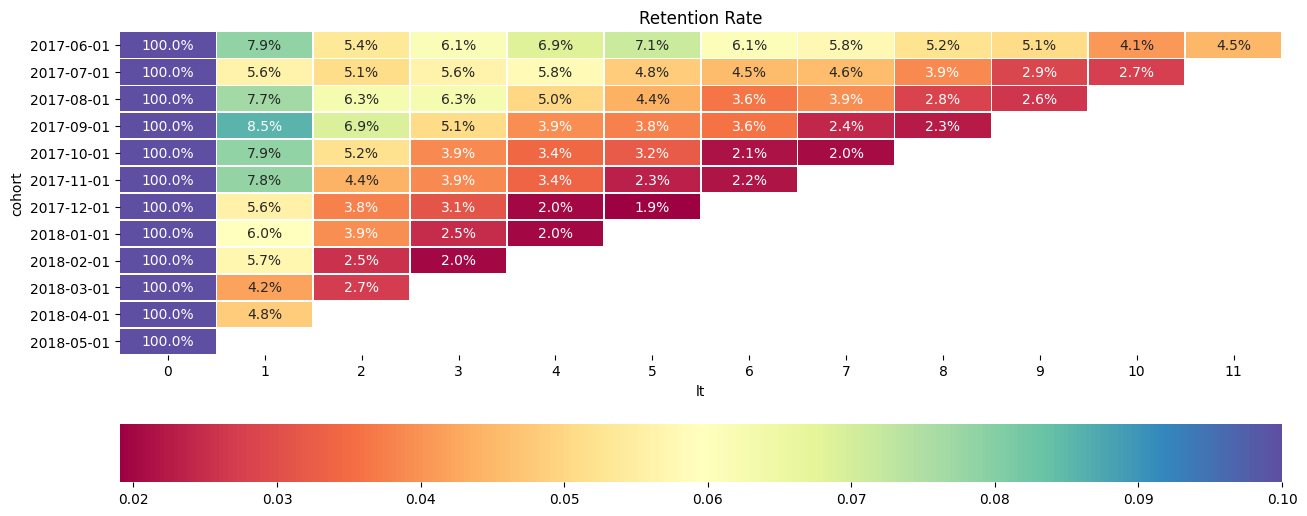

In [87]:
retention.index = retention.index.astype(str)
plt.figure(figsize=(15, 6))
sns.heatmap(
    retention,
    annot=True,
    fmt=".1%",
    cmap="Spectral",
    linewidths=0.5,
    linecolor="white",
    vmax=0.1,
    cbar_kws={"orientation": "horizontal"},
).set(
    title="Retention Rate")
plt.show()

The retention rate graph reveals a critical pattern: all cohorts experience a sharp drop after the first month, but the June 2017 cohort demonstrates remarkable staying power with 4.5% retention even at month 11. There's also a concerning downward trend in retention for newer cohorts, with 2018 cohorts consistently underperforming compared to their 2017 counterparts.

### 3.2 Sales

3.2.1 When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)

In [88]:
conversion = (
    orders.groupby("user_id")["buy_ts"]
    .min()
    .reset_index()
    .rename(columns={"buy_ts": "first_order"})
)
conversion["first_order"] = conversion["first_order"].dt.date

conversion.head()

user_id first_order
0   313578113262317  2018-01-03
1  1575281904278712  2017-06-03
2  2429014661409475  2017-10-11
3  2464366381792757  2018-01-28
4  2551852515556206  2017-11-24

In [89]:
temp = visits.groupby('user_id')['start_ts_x'].min().reset_index().rename(columns={"start_ts_x": "first_visit"})
temp.head()

user_id         first_visit
0   11863502262781 2018-03-01 17:27:00
1   49537067089222 2018-02-06 15:55:00
2  297729379853735 2017-06-07 18:47:00
3  313578113262317 2017-09-18 22:49:00
4  325320750514679 2017-09-30 14:29:00

In [90]:
conversion = conversion.merge(temp, how='left', on='user_id')
conversion.head()

user_id first_order         first_visit
0   313578113262317  2018-01-03 2017-09-18 22:49:00
1  1575281904278712  2017-06-03 2017-06-03 10:13:00
2  2429014661409475  2017-10-11 2017-10-11 17:14:00
3  2464366381792757  2018-01-28 2018-01-27 20:10:00
4  2551852515556206  2017-11-24 2017-11-24 10:14:00

In [91]:
conversion["first_visit"] = conversion["first_visit"].dt.date
conversion.head()

user_id first_order first_visit
0   313578113262317  2018-01-03  2017-09-18
1  1575281904278712  2017-06-03  2017-06-03
2  2429014661409475  2017-10-11  2017-10-11
3  2464366381792757  2018-01-28  2018-01-27
4  2551852515556206  2017-11-24  2017-11-24

In [92]:
conversion["conversion"] = (
    (
        pd.to_datetime(conversion["first_order"])
        - pd.to_datetime(conversion["first_visit"])
    )
    / np.timedelta64(1, "D")
).astype("int")
conversion.head()

user_id first_order first_visit  conversion
0   313578113262317  2018-01-03  2017-09-18         107
1  1575281904278712  2017-06-03  2017-06-03           0
2  2429014661409475  2017-10-11  2017-10-11           0
3  2464366381792757  2018-01-28  2018-01-27           1
4  2551852515556206  2017-11-24  2017-11-24           0

In [93]:
fig = px.histogram(conversion, x="conversion", nbins=200, range_x=(0,40))
fig.show()

Most of the visitors make their first purchase on the first day of their visit or the next day. 

In [94]:
conversion['conversion'].describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: conversion, dtype: float64

In [95]:
print(
    " The overall conversion is {:.1%}".format(
        orders["user_id"].nunique() / visits["user_id"].nunique()
    )
)

 The overall conversion is 16.0%


3.2.2 How many orders do they make during a given period of time?


Let's look from the perspective of cohort analysis. Note, that we make cohorts from the first visit, not the first purchase, as we are investigating marketing expences, so it is more important to us to know when a buyer first used the website.

In [96]:
orders = orders.merge(conversion, on='user_id')
orders.head()

buy_ts  revenue               user_id first_order first_visit  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01  2017-06-01   

   conversion  
0           0  
1           0  
2           0  
3           0  
4           0

In [97]:
orders['first_order_month']=orders['first_order'].values.astype('datetime64[M]')
orders['month'] = orders['buy_ts'].values.astype('datetime64[M]')
orders.head()

buy_ts  revenue               user_id first_order first_visit  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01  2017-06-01   

   conversion first_order_month      month  
0           0        2017-06-01 2017-06-01  
1           0        2017-06-01 2017-06-01  
2           0        2017-06-01 2017-06-01  
3           0        2017-06-01 2017-06-01  
4           0        2017-06-01 2017-06-01

In [98]:
cohort_sizes = orders.groupby('first_order_month').agg({'user_id': 'nunique'}).reset_index()
cohort_sizes.columns=['first_order_month','cohort_size']
cohort_sizes

first_order_month  cohort_size
0         2017-06-01         2023
1         2017-07-01         1923
2         2017-08-01         1370
3         2017-09-01         2581
4         2017-10-01         4340
5         2017-11-01         4081
6         2017-12-01         4383
7         2018-01-01         3373
8         2018-02-01         3651
9         2018-03-01         3533
10        2018-04-01         2276
11        2018-05-01         2988
12        2018-06-01            1

In [99]:
cohort=orders.groupby(['first_order_month', 'month'])['revenue'].count().reset_index()
cohort.columns=['first_order_month','month','orders']
cohort.head()

first_order_month      month  orders
0        2017-06-01 2017-06-01    2354
1        2017-06-01 2017-07-01     177
2        2017-06-01 2017-08-01     174
3        2017-06-01 2017-09-01     226
4        2017-06-01 2017-10-01     292

In [100]:
cohort = cohort.merge(cohort_sizes, on="first_order_month")
cohort.head()

first_order_month      month  orders  cohort_size
0        2017-06-01 2017-06-01    2354         2023
1        2017-06-01 2017-07-01     177         2023
2        2017-06-01 2017-08-01     174         2023
3        2017-06-01 2017-09-01     226         2023
4        2017-06-01 2017-10-01     292         2023

In [101]:
cohort['age_month'] = (cohort['month'].dt.to_period('M') - cohort['first_order_month'].dt.to_period('M')).apply(lambda x: x.n)
cohort['orders_per_buyer']=cohort['orders']/cohort['cohort_size']
cohort.head()

first_order_month      month  orders  cohort_size  age_month  \
0        2017-06-01 2017-06-01    2354         2023          0   
1        2017-06-01 2017-07-01     177         2023          1   
2        2017-06-01 2017-08-01     174         2023          2   
3        2017-06-01 2017-09-01     226         2023          3   
4        2017-06-01 2017-10-01     292         2023          4   

   orders_per_buyer  
0          1.163618  
1          0.087494  
2          0.086011  
3          0.111715  
4          0.144340

In [102]:
cohort_pivot=cohort.pivot_table(
        index='first_order_month', 
        columns='age_month', 
        values='orders_per_buyer', 
        aggfunc='sum'
    )

cohort_pivot.round(2).fillna('')

age_month            0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         1.16  0.09  0.09  0.11  0.14  0.11  0.14  0.09   0.1  0.08   
2017-07-01         1.14  0.05  0.06  0.05  0.04  0.04  0.03  0.03  0.03  0.01   
2017-08-01         1.12  0.08  0.07  0.06  0.06  0.05  0.04  0.06  0.03  0.03   
2017-09-01         1.14  0.08  0.06  0.06  0.03  0.04  0.04  0.02  0.02         
2017-10-01         1.14  0.07  0.04  0.03  0.03  0.02  0.02  0.03               
2017-11-01         1.18   0.1  0.04  0.05  0.03  0.01  0.02                     
2017-12-01         1.15  0.06  0.05  0.04  0.02  0.02                           
2018-01-01         1.12  0.07  0.05  0.02  0.02                                 
2018-02-01         1.12  0.06  0.02  0.02                                       
2018-03-01         1.17  0.05  0.05                                             
2018-04-01         1.10  0.09                                                   
2018-05-01         1.09                                                         
2018-06-01         1.00                                                         

age_month            10    11  
first_order_month              
2017-06-01         0.05  0.04  
2017-07-01         0.03        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01                     
2018-06-01

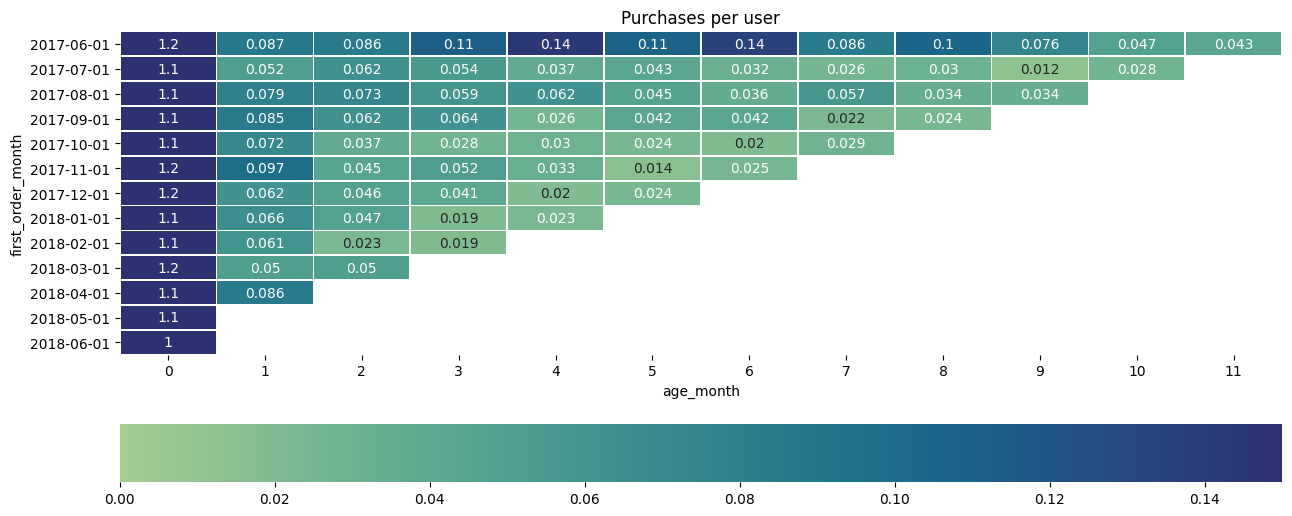

In [103]:
cohort_pivot.index = cohort_pivot.index.astype(str)
plt.figure(figsize=(15, 6))
sns.heatmap(
    cohort_pivot,
    annot=True,
    cmap="crest",
    vmin=0,
    vmax=0.15,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"orientation": "horizontal"},
).set(title="Purchases per user")
plt.show()

In [104]:
cohort_piv_cum=cohort.pivot_table(
        index='first_order_month', 
        columns='age_month', 
        values='orders_per_buyer', 
        aggfunc='sum'
        ).cumsum(axis=1)

cohort_piv_cum.round(2).fillna('')

age_month            0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         1.16  1.25  1.34  1.45  1.59   1.7  1.84  1.92  2.03   2.1   
2017-07-01         1.14  1.19  1.25  1.31  1.34  1.39  1.42  1.44  1.47  1.49   
2017-08-01         1.12   1.2  1.27  1.33  1.39  1.44  1.47  1.53  1.56   1.6   
2017-09-01         1.14  1.22  1.28  1.35  1.37  1.42  1.46  1.48   1.5         
2017-10-01         1.14  1.22  1.25  1.28  1.31  1.34  1.35  1.38               
2017-11-01         1.18  1.28  1.32  1.37  1.41  1.42  1.45                     
2017-12-01         1.15  1.21  1.26   1.3  1.32  1.34                           
2018-01-01         1.12  1.19  1.24  1.25  1.28                                 
2018-02-01         1.12  1.18  1.21  1.22                                       
2018-03-01         1.17  1.22  1.27                                             
2018-04-01         1.10  1.18                                                   
2018-05-01         1.09                                                         
2018-06-01         1.00                                                         

age_month            10    11  
first_order_month              
2017-06-01         2.15  2.19  
2017-07-01         1.51        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01                     
2018-06-01

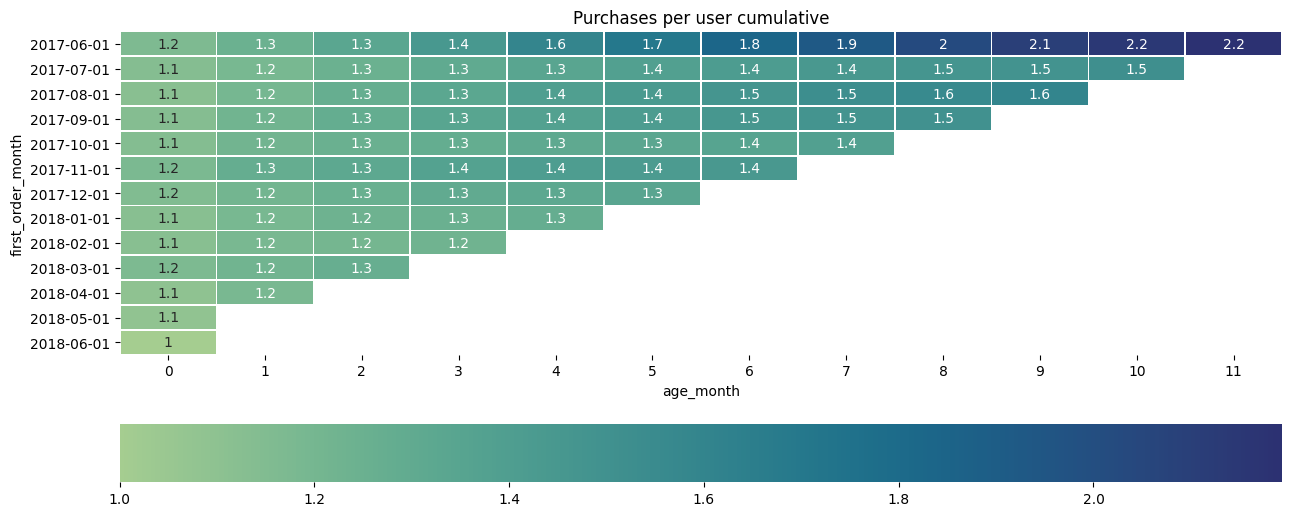

In [105]:
cohort_piv_cum.index = cohort_piv_cum.index.astype(str)
plt.figure(figsize=(15, 6))
sns.heatmap(
    cohort_piv_cum,
    annot=True,
    cmap="crest",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"orientation": "horizontal"},
).set(title="Purchases per user cumulative")
plt.show()


The June 2017 cohort shows the strongest purchase behavior, reaching 2.2 purchases per user by month 10-11, significantly outperforming all other cohorts.
That logically goes from our retention rates numbers - users from the first cohort stayed longer with our product, thus, making more purchases over time.
Most cohorts start with similar initial purchase rates (1.0-1.2 purchases in month 0), but diverge in their long-term behavior.
Purchase frequency growth is gradual across all cohorts, typically increasing by 0.1 purchases per month.
More recent cohorts (2018) show slightly lower purchase progression compared to 2017 cohorts at the same age.
The June 2018 cohort starts with the lowest initial purchase rate (1.0), suggesting possible deterioration in new customer quality.
August and September 2017 cohorts show respectable performance, reaching 1.6 and 1.5 purchases by months 9 and 8 respectively.
Even the best-performing cohort (June 2017) shows purchase frequency plateauing at 2.2 after month 10, indicating a natural ceiling to purchase behavior.



3.2.3 What is the average purchase size?



In [106]:
purchase_size = (orders['revenue'].sum()/orders['revenue'].count()).round(1)
purchase_size

5.0

The average purchase size is 5

We are using cohorts from the "visits" table, considering that the user may have come from marketing expences, but made his first purchase next month, so it is more important to us when his first session was, not the first purchase.

In [107]:
avg_cohort_purchase = orders.groupby("first_order_month")["revenue"].mean().round(2)
avg_cohort_purchase

first_order_month
2017-06-01    5.41
2017-07-01    5.54
2017-08-01    5.30
2017-09-01    8.94
2017-10-01    4.60
2017-11-01    4.42
2017-12-01    5.68
2018-01-01    3.87
2018-02-01    3.75
2018-03-01    4.30
2018-04-01    4.39
2018-05-01    4.29
2018-06-01    3.42
Name: revenue, dtype: float64

The September, 2017 cohort has the largest average purchase size.

In [108]:
orders['buy_month_name'] = orders['buy_ts'].dt.month_name()
avg_monthname_purchase = orders.groupby("buy_month_name")["revenue"].mean().round(2).sort_values()
avg_monthname_purchase

buy_month_name
June         4.06
January      4.11
May          4.77
November     4.78
February     4.84
August       4.85
October      4.93
April        5.15
July         5.31
March        5.41
September    5.42
December     5.85
Name: revenue, dtype: float64

In [109]:
orders["buy_month"] = orders["buy_ts"].values.astype('datetime64[M]')
avg_month_purchase = (
    orders.groupby("buy_month")["revenue"].mean().round(2)
).reset_index()
avg_month_purchase["buy_month"] = avg_month_purchase["buy_month"].dt.date
avg_month_purchase

buy_month  revenue
0   2017-06-01     4.06
1   2017-07-01     5.31
2   2017-08-01     4.85
3   2017-09-01     5.42
4   2017-10-01     4.93
5   2017-11-01     4.78
6   2017-12-01     5.85
7   2018-01-01     4.11
8   2018-02-01     4.84
9   2018-03-01     5.41
10  2018-04-01     5.15
11  2018-05-01     4.77
12  2018-06-01     3.42

<AxesSubplot:xlabel='buy_month'>

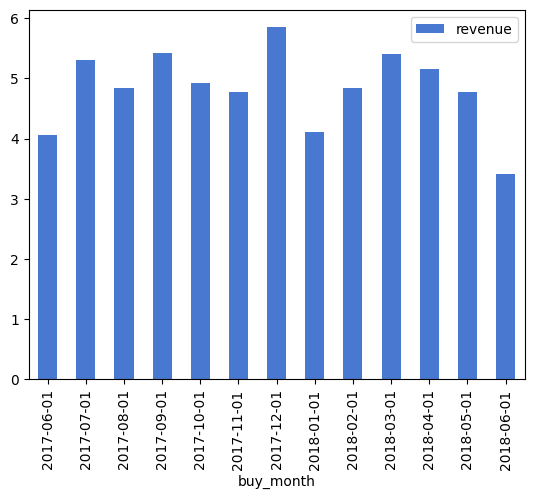

In [110]:
avg_month_purchase.plot(kind='bar', x='buy_month', y='revenue')


December, 2017 shows the biggest number of average purchase size.

3.2.4 How much money do they bring? (LTV)



In [111]:
ltv_cohort=orders.groupby(['first_order_month','buy_month'])['revenue'].sum().reset_index()
ltv_cohort.columns = ['first_order_month','month','revenue']
ltv_cohort.head()

first_order_month      month  revenue
0        2017-06-01 2017-06-01  9557.49
1        2017-06-01 2017-07-01   981.82
2        2017-06-01 2017-08-01   885.34
3        2017-06-01 2017-09-01  1931.30
4        2017-06-01 2017-10-01  2068.58

In [112]:
ltv_cohort=ltv_cohort.merge(cohort_sizes, on=["first_order_month"])
ltv_cohort.head()

first_order_month      month  revenue  cohort_size
0        2017-06-01 2017-06-01  9557.49         2023
1        2017-06-01 2017-07-01   981.82         2023
2        2017-06-01 2017-08-01   885.34         2023
3        2017-06-01 2017-09-01  1931.30         2023
4        2017-06-01 2017-10-01  2068.58         2023

In [113]:
ltv_cohort["age"] = (
    ltv_cohort["month"].dt.to_period("M")
    - ltv_cohort["first_order_month"].dt.to_period("M")
).apply(lambda x: x.n)
ltv_cohort.head()

first_order_month      month  revenue  cohort_size  age
0        2017-06-01 2017-06-01  9557.49         2023    0
1        2017-06-01 2017-07-01   981.82         2023    1
2        2017-06-01 2017-08-01   885.34         2023    2
3        2017-06-01 2017-09-01  1931.30         2023    3
4        2017-06-01 2017-10-01  2068.58         2023    4

In [114]:
ltv_cohort["ltv"] = ltv_cohort["revenue"] / ltv_cohort["cohort_size"]
ltv_cohort.head()

first_order_month      month  revenue  cohort_size  age       ltv
0        2017-06-01 2017-06-01  9557.49         2023    0  4.724414
1        2017-06-01 2017-07-01   981.82         2023    1  0.485329
2        2017-06-01 2017-08-01   885.34         2023    2  0.437637
3        2017-06-01 2017-09-01  1931.30         2023    3  0.954671
4        2017-06-01 2017-10-01  2068.58         2023    4  1.022531

In [115]:
ltv_table = ltv_cohort.pivot_table(
    index="first_order_month", columns="age", values="ltv", aggfunc="mean"
).cumsum(axis=1)
ltv_table

age                      0         1         2          3          4   \
first_order_month                                                       
2017-06-01         4.724414  5.209743  5.647380   6.602051   7.624582   
2017-07-01         6.010218  6.345429  6.968960   7.327936   7.504727   
2017-08-01         5.276518  5.748511  6.206993   6.598270   7.092321   
2017-09-01         5.644529  6.762115  7.283045  11.258838  11.659396   
2017-10-01         5.003733  5.539495  5.730889   5.888035   6.039594   
2017-11-01         5.154683  5.553916  5.753472   6.078424   6.226437   
2017-12-01         4.738191  4.998565  5.923662   6.988937   7.301866   
2018-01-01         4.135636  4.430394  4.734675   4.877453   4.940151   
2018-02-01         4.156987  4.435262  4.513777   4.587921        NaN   
2018-03-01         4.838803  5.139694  5.455253        NaN        NaN   
2018-04-01         4.657597  5.189196       NaN        NaN        NaN   
2018-05-01         4.660562       NaN       NaN        NaN        NaN   
2018-06-01         3.420000       NaN       NaN        NaN        NaN   

age                       5          6          7          8          9   \
first_order_month                                                          
2017-06-01          8.360084   9.310524   9.892116  10.445329  11.051117   
2017-07-01          7.660775   7.780983   7.922803   8.084035   8.231180   
2017-08-01          7.375861   7.586526   7.991533   8.283745   8.471723   
2017-09-01         12.306463  13.008071  13.251220  13.435227        NaN   
2017-10-01          6.159956   6.244772   6.360242        NaN        NaN   
2017-11-01          6.280316   6.395244        NaN        NaN        NaN   
2017-12-01          7.639913        NaN        NaN        NaN        NaN   
2018-01-01               NaN        NaN        NaN        NaN        NaN   
2018-02-01               NaN        NaN        NaN        NaN        NaN   
2018-03-01               NaN        NaN        NaN        NaN        NaN   
2018-04-01               NaN        NaN        NaN        NaN        NaN   
2018-05-01               NaN        NaN        NaN        NaN        NaN   
2018-06-01               NaN        NaN        NaN        NaN        NaN   

age                       10         11  
first_order_month                        
2017-06-01         11.622378  11.879234  
2017-07-01          8.386854        NaN  
2017-08-01               NaN        NaN  
2017-09-01               NaN        NaN  
2017-10-01               NaN        NaN  
2017-11-01               NaN        NaN  
2017-12-01               NaN        NaN  
2018-01-01               NaN        NaN  
2018-02-01               NaN        NaN  
2018-03-01               NaN        NaN  
2018-04-01               NaN        NaN  
2018-05-01               NaN        NaN  
2018-06-01               NaN        NaN

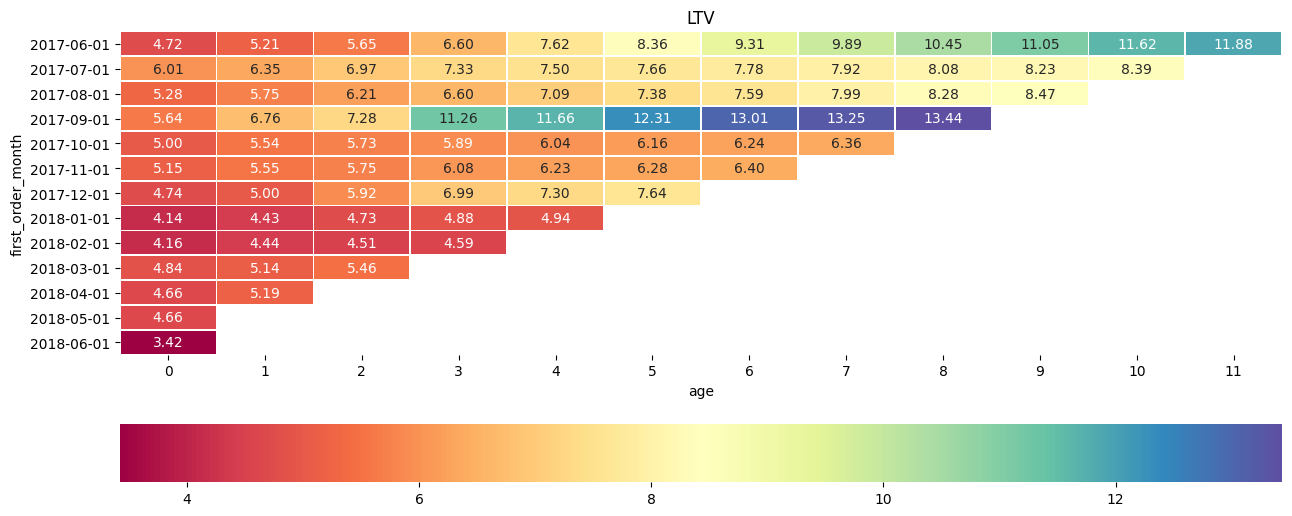

In [116]:
ltv_table.index = ltv_table.index.astype(str)
plt.figure(figsize=(15, 6))
sns.heatmap(
    ltv_table,
    annot=True,
    fmt=".2f",
    cmap="Spectral",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"orientation": "horizontal"}
).set(title="LTV")
plt.show()

The first cohort brings Overall LTV progression: customer value generally increases with age across all cohorts, showing strong retention and continued revenue generation over time.
September 2017 cohort stands out dramatically, reaching exceptional LTV values of 13.44 by month 8, significantly outperforming all other cohorts.
June 2017 cohort shows strong, steady growth, reaching 11.88 by month 11, demonstrating good long-term value development.
More recent cohorts (Jan-June 2018) show lower initial LTV values compared to earlier cohorts, with June 2018 starting at just 3.42.
Older cohorts consistently reach higher LTV values, suggesting better customer quality in earlier acquisition periods.
There's a noticeable decline in initial LTV values starting from October 2017 cohorts onward, potentially indicating lower-quality customer acquisition or changing market conditions.
The September 2017 cohort shows an unusual jump between months 2-3 (from 7.28 to 11.26), suggesting a major event or change affecting this specific group.




### 3.3 Marketing

3.3.1 How much money was spent? Overall, per source and over time.


In [117]:
costs['costs'].sum()

329131.62

Total money spent on marketing - 329132.

In [118]:
costs_source = costs.groupby('source_id')['costs'].sum().reset_index()
costs_source

source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49

In [119]:
fig = px.bar(
    costs_source,
    x="source_id",
    y="costs",
    title="Marketing costs per source",
)
fig.update_xaxes(type="category")
fig.show()

The bar chart illustrates the distribution of the marketing budget across different resources. As shown in the chart, Resource 3 accounts for the largest portion of the marketing budget compared to other resources. In contrast, Resources 9 and 10 received the least funding, with significantly lower allocations than the rest.

In [120]:
costs['month'] = costs['date'].values.astype('datetime64[M]')
monthly_costs = costs.groupby('month')['costs'].sum().reset_index()
monthly_costs

month     costs
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88
5  2017-11-01  37907.88
6  2017-12-01  38315.35
7  2018-01-01  33518.52
8  2018-02-01  32723.03
9  2018-03-01  30415.27
10 2018-04-01  22289.38
11 2018-05-01  22224.27

In [121]:
fig = px.bar(monthly_costs, x='month', y='costs',
        





    title="Marketing costs per month",

)

fig.add_hline(
    y=monthly_costs["costs"].mean(),
    line_dash="dash",
    line_color="purple",
    annotation_text="average costs",
    annotation_position="top left",
)

fig.show()

Monthly marketing costs of the months from November, 2017, till March, 2018, were higher than average costs for 12 months, with the peak in December, 2017 - 38315.
The lowest budget was in August - only 14790.

In [122]:
costs_source_m = costs.groupby(['month', 'source_id'])['costs'].sum().reset_index()
costs_source_m.head()

month  source_id    costs
0 2017-06-01          1  1125.61
1 2017-06-01          2  2427.38
2 2017-06-01          3  7731.65
3 2017-06-01          4  3514.80
4 2017-06-01          5  2616.12

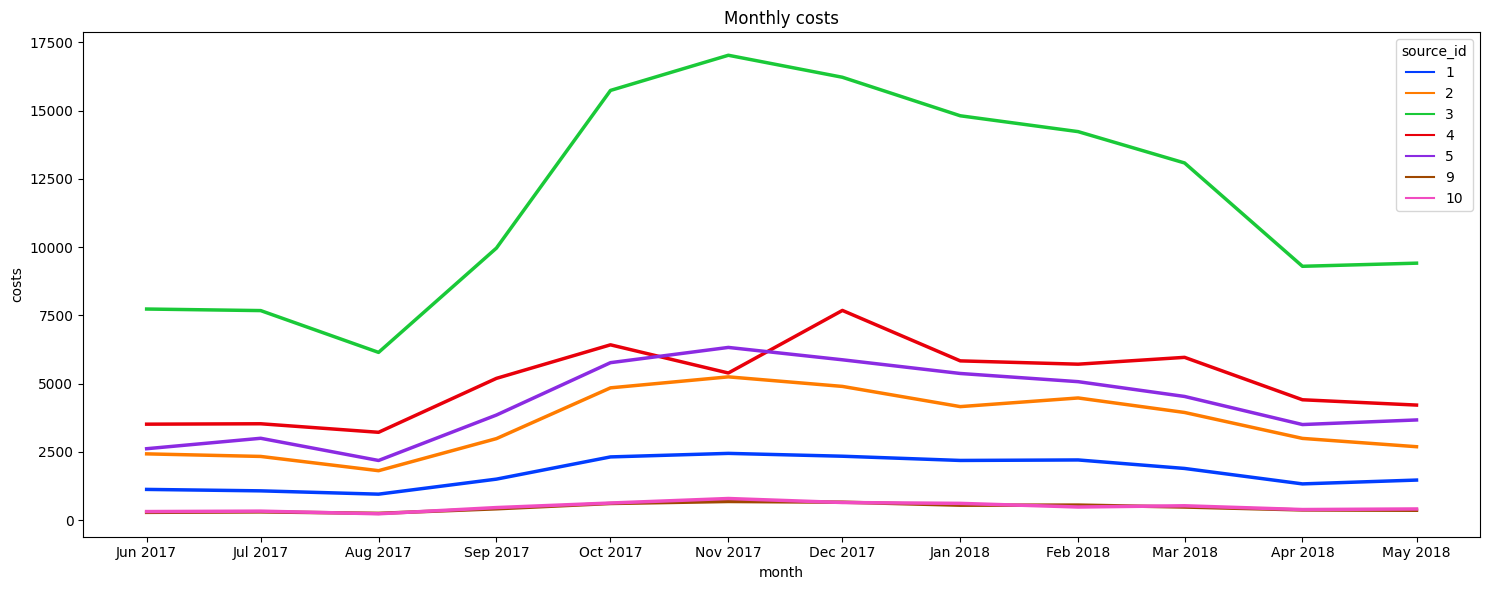

In [123]:
plt.figure(figsize=(15, 6))
plt.title("Monthly costs")
sns.lineplot(
    data=costs_source_m,
    x="month",
    y="costs",
    hue="source_id",
    palette="bright",
    linewidth=2.5,
)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

plt.tight_layout()

Source 3 dominates spending, with costs peaking at nearly 17000 in November 2017 before gradually declining to around 9500 by May 2018.
There's a dramatic increase in Source 3 spending from August to November 2017, more than doubling from approximately 6000 to 17000.
Sources 4 and 5 represent the middle tier of spending, generally ranging between 4000-7500 per month.
Sources 1, 2, 9, and 10 consistently maintain lower spending levels, mostly below 3000 monthly.
Source 10 shows the lowest and most consistent spending, staying below 1000 throughout the period.
All sources show a pattern of increased spending in October-December, 2017, followed by gradual reductions through 2018.



In [124]:
fig = px.bar(
    costs_source_m,
    x="month",
    y="costs",
    color="source_id",
    barmode="group",
    title="Costs by Month and Source ID",
    labels={"month": "Month", "costs": "Costs", "source_id": "Source ID"},
    color_discrete_sequence=px.colors.qualitative.Plotly,  # You can choose different color schemes
)

# Improve layout
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Costs",
    legend_title="Source ID",
)

# Display the figure
fig.show()

We see that source_id 3 was consistently the top priority for marketing spending during the entire period, and the distribution pattern among the different sources remained relatively stable from month to month, despite fluctuations in total monthly spend.
Total marketing costs peaked during October-December 2017, reaching nearly 40K per month, before gradually declining to about 20K by April-May 2018.
August 2017 shows the lowest overall spending at approximately 15K, followed by a significant increase in September.
The October-December, 2017 period shows the highest sustained marketing investment across most sources.



3.3.2 How much did customer acquisition from each of the sources cost?

In [125]:
monthly_buyers = orders.groupby("first_order_month")["user_id"].nunique().reset_index()
monthly_buyers

first_order_month  user_id
0         2017-06-01     2023
1         2017-07-01     1923
2         2017-08-01     1370
3         2017-09-01     2581
4         2017-10-01     4340
5         2017-11-01     4081
6         2017-12-01     4383
7         2018-01-01     3373
8         2018-02-01     3651
9         2018-03-01     3533
10        2018-04-01     2276
11        2018-05-01     2988
12        2018-06-01        1

In [126]:
monthly_cac = monthly_buyers.merge(
    monthly_costs, how="left", left_on="first_order_month", right_on="month"
)

monthly_cac = monthly_cac.drop(columns="first_order_month")

monthly_cac['cac'] = monthly_cac['costs']/monthly_cac['user_id']
monthly_cac

user_id      month     costs        cac
0      2023 2017-06-01  18015.00   8.905091
1      1923 2017-07-01  18240.59   9.485486
2      1370 2017-08-01  14790.54  10.796015
3      2581 2017-09-01  24368.91   9.441654
4      4340 2017-10-01  36322.88   8.369327
5      4081 2017-11-01  37907.88   9.288870
6      4383 2017-12-01  38315.35   8.741809
7      3373 2018-01-01  33518.52   9.937302
8      3651 2018-02-01  32723.03   8.962758
9      3533 2018-03-01  30415.27   8.608907
10     2276 2018-04-01  22289.38   9.793225
11     2988 2018-05-01  22224.27   7.437841
12        1        NaT       NaN        NaN

In [127]:
print("The average CAC is", monthly_cac["cac"].mean().round(2))

The average CAC is 9.15


In [128]:
fig = px.line(monthly_cac, x="month", y="cac", title="CAC")
fig.add_hline(
    y=monthly_cac["cac"].mean(),
    line_dash="dash",
    line_color="purple",
    annotation_text="average cac",
    annotation_position="top left",
)



fig.show()

The CAC fluctuates significantly throughout the year, with notable peaks in August 2017, January 2018, and April 2018.
There appears to be a cyclical pattern with peaks occurring roughly every 2-3 months.



In [129]:
first_source = (
    visits.sort_values("start_ts_x").groupby("user_id").first()["source_id"].reset_index()
)
first_source.columns = ["user_id", "first_source"]
first_source.head()

user_id  first_source
0   11863502262781             3
1   49537067089222             2
2  297729379853735             3
3  313578113262317             2
4  325320750514679             5

In [130]:
orders = orders.merge(first_source, on='user_id', how='left')
orders.head()

buy_ts  revenue               user_id first_order first_visit  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01  2017-06-01   

   conversion first_order_month      month buy_month_name  buy_month  \
0           0        2017-06-01 2017-06-01           June 2017-06-01   
1           0        2017-06-01 2017-06-01           June 2017-06-01   
2           0        2017-06-01 2017-06-01           June 2017-06-01   
3           0        2017-06-01 2017-06-01           June 2017-06-01   
4           0        2017-06-01 2017-06-01           June 2017-06-01   

   first_source  
0             1  
1             2  
2             2  
3             2  
4             3

In [131]:
buyers_per_month_source=orders.groupby(['first_order_month','first_source'])['user_id'].nunique().reset_index()


In [132]:
buyers_per_month_source = buyers_per_month_source.merge(
    costs_source_m, how='left', left_on=['first_order_month', 'first_source'], right_on=['month', 'source_id']
)

buyers_per_month_source.head()

first_order_month  first_source  user_id      month  source_id    costs
0        2017-06-01             1      190 2017-06-01        1.0  1125.61
1        2017-06-01             2      235 2017-06-01        2.0  2427.38
2        2017-06-01             3      638 2017-06-01        3.0  7731.65
3        2017-06-01             4      413 2017-06-01        4.0  3514.80
4        2017-06-01             5      384 2017-06-01        5.0  2616.12

In [133]:
buyers_per_month_source = buyers_per_month_source.drop(columns="first_order_month")


In [134]:
buyers_per_month_source = buyers_per_month_source.drop(columns="source_id")
buyers_per_month_source.head()

first_source  user_id      month    costs
0             1      190 2017-06-01  1125.61
1             2      235 2017-06-01  2427.38
2             3      638 2017-06-01  7731.65
3             4      413 2017-06-01  3514.80
4             5      384 2017-06-01  2616.12

In [135]:
buyers_per_month_source["cac"] = buyers_per_month_source['costs'] / buyers_per_month_source['user_id']
buyers_per_month_source.head()

first_source  user_id      month    costs        cac
0             1      190 2017-06-01  1125.61   5.924263
1             2      235 2017-06-01  2427.38  10.329277
2             3      638 2017-06-01  7731.65  12.118574
3             4      413 2017-06-01  3514.80   8.510412
4             5      384 2017-06-01  2616.12   6.812813

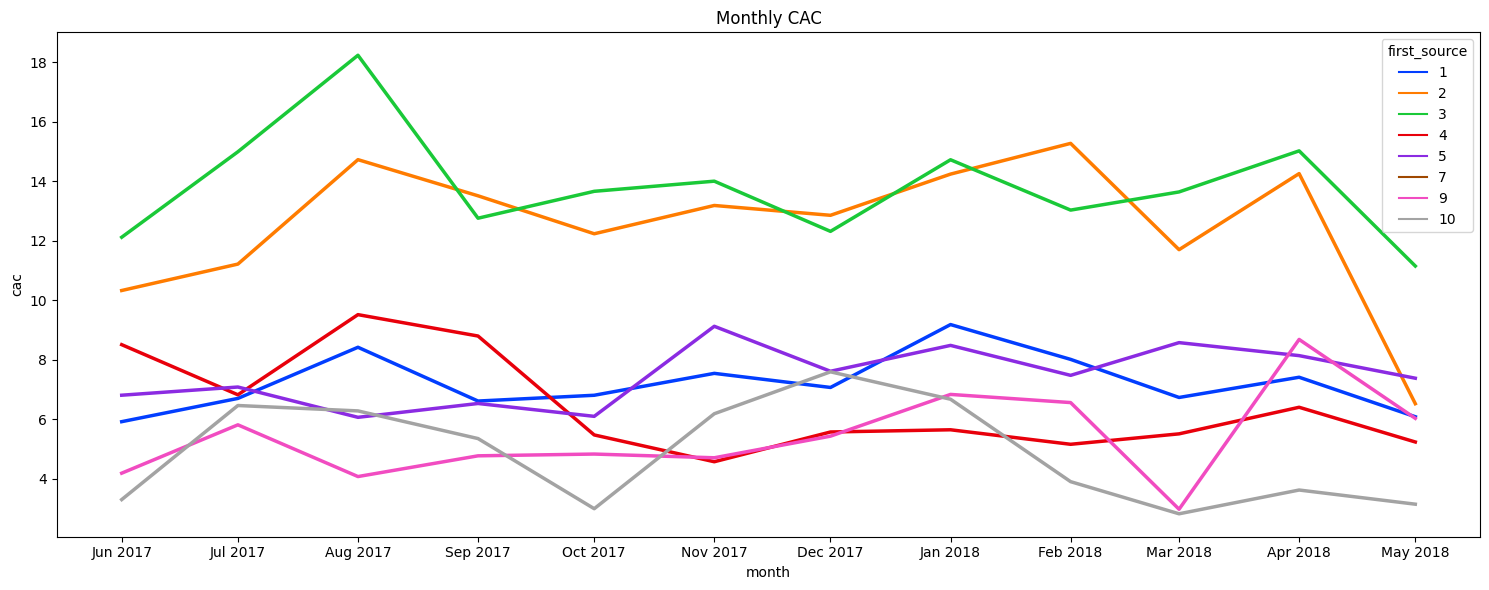

In [136]:
plt.figure(figsize=(15, 6))
plt.title("Monthly CAC")
sns.lineplot(data=buyers_per_month_source, x="month", y="cac", hue='first_source', palette='bright', linewidth=2.5)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

plt.tight_layout()

Source 3 consistently has the highest CAC throughout most of the period.
Source 2 has the second highest CAC overall.
Sources 9, 10, 7, 4, and 1 generally maintain lower CAC values, mostly staying below 8 throughout the period.
Significant seasonal patterns are visible, with many sources showing peaks in August 2017 and January-April 2018.
Source 10 shows the most consistent downward trend over time, suggesting improving efficiency.
Source 9 shows high volatility, with a significant drop in March 2018 followed by a sharp increase in April 2018.



In [137]:
avg_cac = buyers_per_month_source.groupby("first_source")['cac'].mean().reset_index()
avg_cac

first_source        cac
0             1   7.212107
1             2  12.504068
2             3  13.802743
3             4   6.439374
4             5   7.451938
5             7        NaN
6             9   5.413892
7            10   4.867125

In [138]:
fig = px.bar(
    avg_cac,
    x="first_source",
    y="cac",
    title="Average CAC by source",
)
fig.update_xaxes(type="category")
fig.show()

Source 3 has the highest CAC at 13.8, making it the most expensive channel for acquiring customers.
Source 2 also has a relatively high CAC at about 12.5.
Sources 9 and 10 have the lowest CAC, both under 6, making them the most cost-efficient channels for customer acquisition.
Sources 1, 4, and 5 have moderate CAC values between 6.4-7.3.
There's significant variation in CAC across channels, with the most expensive channel (Source 3) costing nearly 3 times more than the most cost-efficient channel (Source 10).


3.3.3 How worthwhile where the investments? (ROI)

In [139]:
ltv_cohort.head()

first_order_month      month  revenue  cohort_size  age       ltv
0        2017-06-01 2017-06-01  9557.49         2023    0  4.724414
1        2017-06-01 2017-07-01   981.82         2023    1  0.485329
2        2017-06-01 2017-08-01   885.34         2023    2  0.437637
3        2017-06-01 2017-09-01  1931.30         2023    3  0.954671
4        2017-06-01 2017-10-01  2068.58         2023    4  1.022531

In [140]:
monthly_cac

user_id      month     costs        cac
0      2023 2017-06-01  18015.00   8.905091
1      1923 2017-07-01  18240.59   9.485486
2      1370 2017-08-01  14790.54  10.796015
3      2581 2017-09-01  24368.91   9.441654
4      4340 2017-10-01  36322.88   8.369327
5      4081 2017-11-01  37907.88   9.288870
6      4383 2017-12-01  38315.35   8.741809
7      3373 2018-01-01  33518.52   9.937302
8      3651 2018-02-01  32723.03   8.962758
9      3533 2018-03-01  30415.27   8.608907
10     2276 2018-04-01  22289.38   9.793225
11     2988 2018-05-01  22224.27   7.437841
12        1        NaT       NaN        NaN

In [141]:
roi = monthly_cac.merge(
    ltv_cohort, right_on="first_order_month", left_on="month", how="right"
)

roi['roi'] = roi['ltv']/roi['cac']

roi.head()

user_id    month_x    costs       cac first_order_month    month_y  \
0   2023.0 2017-06-01  18015.0  8.905091        2017-06-01 2017-06-01   
1   2023.0 2017-06-01  18015.0  8.905091        2017-06-01 2017-07-01   
2   2023.0 2017-06-01  18015.0  8.905091        2017-06-01 2017-08-01   
3   2023.0 2017-06-01  18015.0  8.905091        2017-06-01 2017-09-01   
4   2023.0 2017-06-01  18015.0  8.905091        2017-06-01 2017-10-01   

   revenue  cohort_size  age       ltv       roi  
0  9557.49         2023    0  4.724414  0.530530  
1   981.82         2023    1  0.485329  0.054500  
2   885.34         2023    2  0.437637  0.049145  
3  1931.30         2023    3  0.954671  0.107205  
4  2068.58         2023    4  1.022531  0.114825

In [142]:
roi_piv = (
    roi.pivot_table(
        index="month_x", columns="age", values="roi", aggfunc="mean"
    )
    .cumsum(axis=1)
    .round(2)
)
roi_piv

age           0     1     2     3     4     5     6     7     8     9     10  \
month_x                                                                        
2017-06-01  0.53  0.59  0.63  0.74  0.86  0.94  1.05  1.11  1.17  1.24  1.31   
2017-07-01  0.63  0.67  0.73  0.77  0.79  0.81  0.82  0.84  0.85  0.87  0.88   
2017-08-01  0.49  0.53  0.57  0.61  0.66  0.68  0.70  0.74  0.77  0.78   NaN   
2017-09-01  0.60  0.72  0.77  1.19  1.23  1.30  1.38  1.40  1.42   NaN   NaN   
2017-10-01  0.60  0.66  0.68  0.70  0.72  0.74  0.75  0.76   NaN   NaN   NaN   
2017-11-01  0.55  0.60  0.62  0.65  0.67  0.68  0.69   NaN   NaN   NaN   NaN   
2017-12-01  0.54  0.57  0.68  0.80  0.84  0.87   NaN   NaN   NaN   NaN   NaN   
2018-01-01  0.42  0.45  0.48  0.49  0.50   NaN   NaN   NaN   NaN   NaN   NaN   
2018-02-01  0.46  0.49  0.50  0.51   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01  0.56  0.60  0.63   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01  0.48  0.53   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-05-01  0.63   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

age           11  
month_x           
2017-06-01  1.33  
2017-07-01   NaN  
2017-08-01   NaN  
2017-09-01   NaN  
2017-10-01   NaN  
2017-11-01   NaN  
2017-12-01   NaN  
2018-01-01   NaN  
2018-02-01   NaN  
2018-03-01   NaN  
2018-04-01   NaN  
2018-05-01   NaN

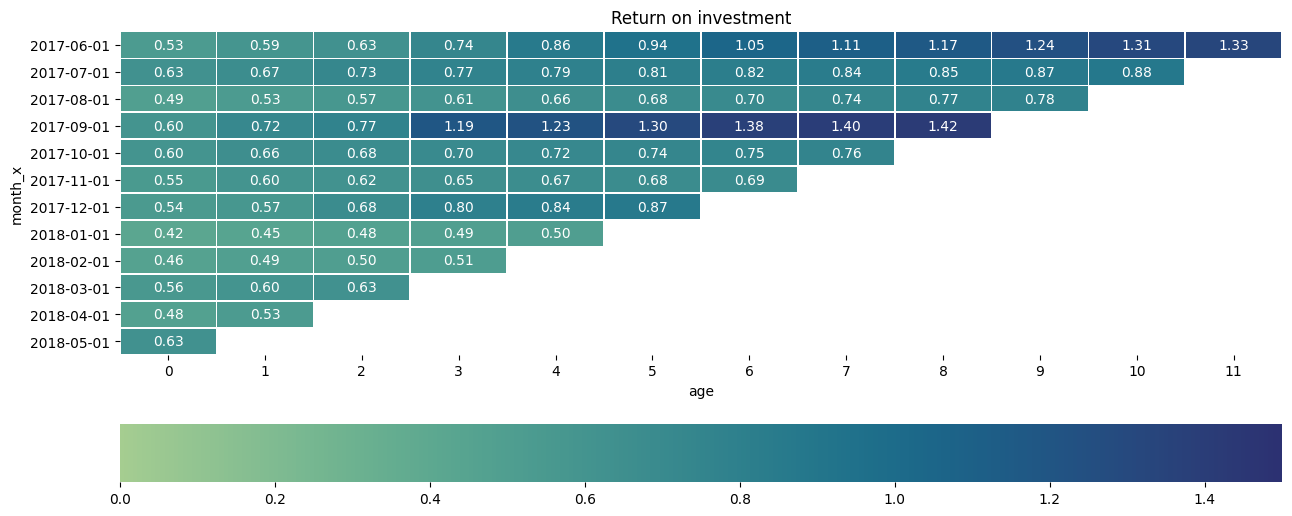

In [143]:
roi_piv.index = roi_piv.index.astype(str)
plt.figure(figsize=(15, 6))
sns.heatmap(
    roi_piv,
    annot=True,
    fmt=".2f",
    cmap="crest",
    vmin=0,
    vmax=1.5,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"orientation": "horizontal"},
).set(title="Return on investment")


plt.show()

Overall trend: The return on investment generally increases with age (horizontal axis), suggesting investments become more profitable over time.

Highest returns: September 2017 cohort shows exceptional performance, reaching returns of 1.42 at 8 months of age - significantly outperforming other cohorts.

Cohort performance: June 2017 cohort demonstrates strong long-term growth, reaching 1.33 ROI at 11 months.

Time to maturity: Most cohorts show accelerated growth in the first 3-4 months before growth rates begin to stabilize.

Seasonal patterns: Earlier cohorts (June-September 2017) generally outperform later cohorts, suggesting potential seasonality effects.
Recent cohorts (early 2018) show lower initial returns compared to 2017 cohorts.

Data completeness: Newer cohorts have less maturity data, making long-term performance comparison difficult.

Volatility: Some cohorts (like September 2017) show significant jumps in returns (from 0.77 to 1.19 between months 2-3), indicating potential volatility.


In [144]:
orders.head()

buy_ts  revenue               user_id first_order first_visit  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01  2017-06-01   

   conversion first_order_month      month buy_month_name  buy_month  \
0           0        2017-06-01 2017-06-01           June 2017-06-01   
1           0        2017-06-01 2017-06-01           June 2017-06-01   
2           0        2017-06-01 2017-06-01           June 2017-06-01   
3           0        2017-06-01 2017-06-01           June 2017-06-01   
4           0        2017-06-01 2017-06-01           June 2017-06-01   

   first_source  
0             1  
1             2  
2             2  
3             2  
4             3

In [145]:
ltv_per_source = (
    orders.groupby(["first_source"])[["user_id", "revenue"]]
    .agg({"user_id": "nunique", "revenue": "sum"})
    .reset_index()
)
ltv_per_source.columns = ["source", "buyers", "revenue"]
ltv_per_source["ltv"] = ltv_per_source["revenue"] / ltv_per_source["buyers"]
ltv_per_source

source  buyers   revenue        ltv
0       1    2899  31090.55  10.724577
1       2    3506  46923.61  13.383802
2       3   10473  54511.24   5.204931
3       4   10296  56696.83   5.506685
4       5    6931  52624.02   7.592558
5       7       1      1.22   1.220000
6       9    1088   5759.40   5.293566
7      10    1329   4450.33   3.348631

In [146]:
roi_per_source = costs_source.merge(ltv_per_source, left_on='source_id', right_on=["source"])
roi_per_source["cac"] = roi_per_source["costs"] / roi_per_source["buyers"]
roi_per_source["romi"] = roi_per_source["ltv"] / roi_per_source["cac"]
roi_per_source

source_id      costs  source  buyers   revenue        ltv        cac  \
0          1   20833.27       1    2899  31090.55  10.724577   7.186364   
1          2   42806.04       2    3506  46923.61  13.383802  12.209367   
2          3  141321.63       3   10473  54511.24   5.204931  13.493901   
3          4   61073.60       4   10296  56696.83   5.506685   5.931779   
4          5   51757.10       5    6931  52624.02   7.592558   7.467479   
5          9    5517.49       9    1088   5759.40   5.293566   5.071222   
6         10    5822.49      10    1329   4450.33   3.348631   4.381106   

       romi  
0  1.492351  
1  1.096191  
2  0.385725  
3  0.928336  
4  1.016750  
5  1.043844  
6  0.764335

In [147]:
fig = px.bar(
    roi_per_source,
    x="source",
    y="romi",
    title="Return on marketing investment per source",
)
fig.update_xaxes(type="category")
fig.show()

Source 1 significantly outperforms all others with a ROMI of approximately 1.5, making it the most efficient marketing channel.
Sources 2, 5, and 9 show similar performance with ROMI values of approximately 1.0-1.1.
Source 3 is the worst-performing channel with a ROMI of only about 0.4, indicating it's losing money on marketing spend.
Source 10 also underperforms with a ROMI of around 0.8, making it only marginally profitable.
There's significant variance in performance across channels, with the best performing nearly 4 times better than the worst.


### Conclusions <a id='da_conclusions'></a>

Source 3 stands out as highly inefficient - it has the highest CAC, lowest ROMI, and highest spending (up to 17K monthly).

Sources 1 and 10 represent better investment opportunities with stronger efficiency metrics.

The September 2017 cohort shows exceptional LTV performance despite average purchase frequency, suggesting high-value transactions.

There's been a significant marketing spend reduction (50%) from December 2017 to May 2018, coinciding with improved CAC efficiency.

Customer quality appears to be declining in 2018, with weaker initial LTV values and retention rates across newer cohorts.

Based on these insights, we would recommend reallocating budget from Source 3, implementing targeted retention initiatives for the month 1-2 transition period, and reassessing acquisition targeting criteria to address the declining quality of newer cohorts.

It is strongly recommended to investigate further what other factors could have led to the strong loyalty of the first cohort that shows the best retention rates.